In [41]:
import pandas as pd

In [42]:

df = pd.read_csv('/Users/ivanleboucher/Desktop/Cours/data_viz/assessment_IPCC/SPM1_1-2000_recon.csv', skiprows=19, encoding='latin1')


In [18]:
df

,1,2,3,4,Unnamed: 4
0,1995,0.65,0.46,0.79,NaN
1,1994,0.64,0.46,0.77,NaN
2,1993,0.62,0.45,0.76,NaN
3,1992,0.61,0.45,0.74,NaN
4,1991,0.59,0.44,0.71,NaN
...,...,...,...,...,...
1986,9,0.10,-0.11,0.38,NaN
1987,8,0.10,-0.11,0.38,NaN
1988,7,0.09,-0.11,0.38,NaN
1989,6,0.09,-0.12,0.37,NaN


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to prepare the dataset
def prepare_data():
    try:
        # Load the observed data

        df_obs = pd.read_csv("/Users/ivanleboucher/Desktop/Cours/data_viz/assessment_IPCC/SPM1_1850-2020_obs.csv", skiprows=15, encoding="latin1")


        df_obs = df_obs.rename(
        columns={
        "1": "Year", 
        "2": "Temperature_Anomaly"} 
        ).drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])  


        df_obs["Temperature_Anomaly"] = pd.to_numeric(df_obs["Temperature_Anomaly"], errors="coerce")

        # Load the reconstructed data
        df_recon = pd.read_csv("/Users/ivanleboucher/Desktop/Cours/data_viz/assessment_IPCC/SPM1_1-2000_recon.csv", skiprows=19, encoding="latin1")
        df_recon = df_recon.rename(
        columns={
        "1": "Year", 
        "2": "surface temperature anomaly",
        "3": "5th percentile",
        "4": "95th percentile"
        }  
        ).drop(columns=["Unnamed: 4"])
        
        df_recon["surface temperature anomaly"] = pd.to_numeric(
            df_recon["surface temperature anomaly"], errors="coerce"
        )
        
        

        return df_obs, df_recon
    except UnicodeDecodeError as e:
        st.error(f"File encoding issue: {e}")
        return pd.DataFrame(), pd.DataFrame()


# Prepare the data
df_obs, df_recon = prepare_data()


In [46]:
prepare_data()

(     Year  Temperature_Anomaly
 0    2016                 1.09
 1    2015                 1.06
 2    2014                 1.03
 3    2013                 1.00
 4    2012                 0.98
 ..    ...                  ...
 157  1859                -0.04
 158  1858                -0.03
 159  1857                -0.01
 160  1856                 0.00
 161  1855                 0.00
 
 [162 rows x 2 columns],
       Year  surface temperature anomaly  5th percentile  95th percentile
 0     1995                         0.65            0.46             0.79
 1     1994                         0.64            0.46             0.77
 2     1993                         0.62            0.45             0.76
 3     1992                         0.61            0.45             0.74
 4     1991                         0.59            0.44             0.71
 ...    ...                          ...             ...              ...
 1986     9                         0.10           -0.11             0.

2025-03-16 18:19:03.086 INFO    numexpr.utils: NumExpr defaulting to 8 threads.
2025-03-16 18:19:05.282 
  command:

    streamlit run /Users/ivanleboucher/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
/Users/ivanleboucher/opt/anaconda3/lib/python3.9/site-packages/streamlit/elements/pyplot.py:147: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.savefig(image, **kwargs)
/Users/ivanleboucher/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


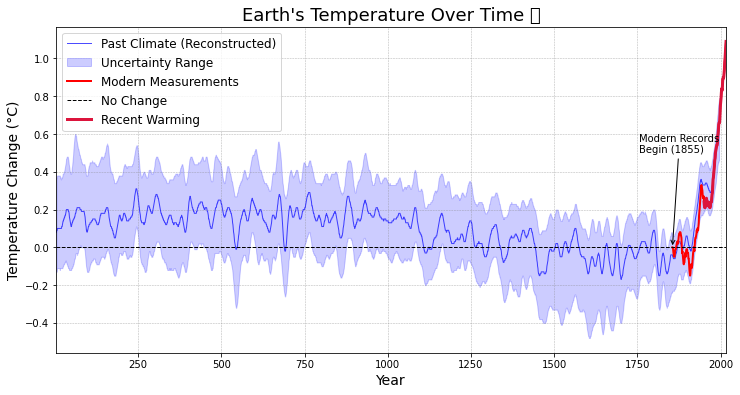

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to prepare the dataset
def prepare_data():
    try:
        # Load the observed data (1850-2020)
        df_obs = pd.read_csv("/Users/ivanleboucher/Desktop/Cours/data_viz/assessment_IPCC/SPM1_1850-2020_obs.csv", skiprows=15, encoding="latin1")
        df_obs = df_obs.rename(
            columns={
                "1": "Year", 
                "2": "Temperature_Anomaly"
            }
        ).drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])  
        df_obs["Temperature_Anomaly"] = pd.to_numeric(df_obs["Temperature_Anomaly"], errors="coerce")
        df_obs["Source"] = "Observed"

        # Load the reconstructed data (1-2000)
        df_recon = pd.read_csv("/Users/ivanleboucher/Desktop/Cours/data_viz/assessment_IPCC/SPM1_1-2000_recon.csv", skiprows=19, encoding="latin1")
        df_recon = df_recon.rename(
            columns={
                "1": "Year", 
                "2": "Temperature_Anomaly",
                "3": "5th percentile",
                "4": "95th percentile"
            }
        ).drop(columns=["Unnamed: 4"])
        df_recon["Temperature_Anomaly"] = pd.to_numeric(
            df_recon["Temperature_Anomaly"], errors="coerce"
        )
        df_recon["Source"] = "Reconstructed"
        
        # Convert to numeric values
        df_recon["Year"] = pd.to_numeric(df_recon["Year"], errors="coerce")
        df_obs["Year"] = pd.to_numeric(df_obs["Year"], errors="coerce")
        
        return df_obs, df_recon
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return pd.DataFrame(), pd.DataFrame()

# Function to create a temperature trend plot using both datasets
def plot_full_temperature_record(df_obs, df_recon):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the reconstructed data (older)
    ax.plot(df_recon["Year"], df_recon["Temperature_Anomaly"], color="blue", lw=1, alpha=0.7, label="Past Climate (Reconstructed)")
    
    # Add confidence interval for reconstructed data
    if "5th percentile" in df_recon.columns and "95th percentile" in df_recon.columns:
        ax.fill_between(
            df_recon["Year"], 
            df_recon["5th percentile"], 
            df_recon["95th percentile"], 
            color="blue", 
            alpha=0.2,
            label="Uncertainty Range"
        )
    
    # Plot the observed data (more recent)
    ax.plot(df_obs["Year"], df_obs["Temperature_Anomaly"], color="red", lw=2, label="Modern Measurements")
    
    # Styling
    ax.set_title("Earth's Temperature Over Time 🌍", fontsize=18)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Temperature Change (°C)", fontsize=14)
    ax.axhline(0, color="black", lw=1, linestyle="--", label="No Change")
    
    # Highlight the current warming trend
    recent_years = df_obs[df_obs["Year"] >= 1950]
    ax.plot(recent_years["Year"], recent_years["Temperature_Anomaly"], color="crimson", lw=3, label="Recent Warming")
    
    # Add annotations
    modern_start = df_obs["Year"].min()
    ax.annotate(f"Modern Records\nBegin ({int(modern_start)})", 
                xy=(modern_start, df_obs.loc[df_obs["Year"] == modern_start, "Temperature_Anomaly"].values[0]),
                xytext=(modern_start-100, 0.5),
                arrowprops=dict(arrowstyle="->", color="black"))
    
    # Add legend and grid
    ax.legend(fontsize=12, loc="upper left")
    ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)
    
    # Set limits to show the full timeline
    ax.set_xlim(df_recon["Year"].min(), df_obs["Year"].max())
    
    return fig

# Streamlit App
def main():
    # Set page config
    st.set_page_config(
        page_title="Earth's Temperature Story",
        page_icon="🌍",
        layout="wide"
    )
    
    # Prepare the data
    df_obs, df_recon = prepare_data()
    
    # Check if data is loaded correctly
    if df_obs.empty or df_recon.empty:
        st.error("Could not load the datasets. Please check file paths and try again.")
        return
    
    # Title and Header
    st.title("🌱 Earth's Temperature Story: From Year 1 to Today")
    st.header("Exploring how our planet's temperature has changed over thousands of years")
    
    # Introduction
    st.markdown("""
    This interactive app shows how Earth's temperature has changed over a very long time:
    * Blue line: Temperature from long ago (Year 1-2000) based on scientific reconstruction
    * Red line: Temperature measured with modern instruments (1850-2020)
    * Look at the recent red line going up! That's global warming happening right now!
    """)
    
    # Calculate some key statistics
    earliest_year = int(df_recon["Year"].min())
    latest_year = int(df_obs["Year"].max())
    total_years = latest_year - earliest_year
    recent_warming = df_obs[df_obs["Year"] >= 1950]["Temperature_Anomaly"].mean()
    max_temp = df_obs["Temperature_Anomaly"].max()
    
    # Display key metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Years of Data", f"{total_years:,}")
    with col2:
        st.metric("Recent Warming", f"{recent_warming:.2f}°C")
    with col3:
        st.metric("Highest Temperature", f"{max_temp:.2f}°C")
    
    # Interactive Temperature Plot
    st.subheader("Earth's Temperature Journey Through Time")
    fig = plot_full_temperature_record(df_obs, df_recon)
    st.pyplot(fig)
    
    # Show data explorer
    with st.expander("Explore the Raw Data"):
        tab1, tab2 = st.tabs(["Modern Data (1850-2020)", "Reconstructed Data (Year 1-2000)"])
        with tab1:
            st.dataframe(df_obs)
        with tab2:
            st.dataframe(df_recon)
    
    # Interactive Elements for Kids
    st.subheader("What Can We Do About Climate Change?")
    action = st.selectbox(
        "Choose an action to see how it helps:",
        ["Plant trees 🌳", "Use renewable energy 🔆", "Reduce waste ♻️", "Save water 💧", "Walk or cycle 🚲"]
    )
    
    actions_info = {
        "Plant trees 🌳": "Trees absorb carbon dioxide (CO₂) from the air, helping cool the Earth!",
        "Use renewable energy 🔆": "Solar and wind power don't release greenhouse gases like burning coal or oil does.",
        "Reduce waste ♻️": "Making new things uses energy, which often creates greenhouse gases.",
        "Save water 💧": "Treating and pumping water uses a lot of energy. Saving water saves energy too!",
        "Walk or cycle 🚲": "Cars release CO₂ that warms the planet. Walking and cycling are clean ways to travel!"
    }
    
    st.info(actions_info[action])
    
    # Simple Quiz
    st.subheader("Test Your Knowledge!")
    q1 = st.radio(
        "Which of these is making Earth warmer?",
        ["❄️ Too much snow", "🚗 Pollution from cars and factories", "🌕 The moon getting closer"]
    )
    
    if q1 == "🚗 Pollution from cars and factories":
        st.success("Correct! Pollution creates greenhouse gases that trap heat in Earth's atmosphere.")
    else:
        st.error("Not quite. Try again!")
    
    # Footer
    st.markdown("---")
    st.write("Data source: IPCC Climate Change Report")
    st.caption("Created for educational purposes")

# Run the app
if __name__ == "__main__":
    main()
